In [5]:
# Imported Libraries
import numpy as np
import mpmath as mp
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
import math as m
import mpmath as mp
from matplotlib import gridspec
from collections import Counter

In [6]:
# Constants
pc2cm = 3.086E18 # Parsecs to cm     
MO2kg=1.989e+30  # Solar Mass to kilograms  

In [7]:
# NOTE: All Data in the DISK SETUP units are Kg and Parsecs.

# Galaxy Properties
maxr = 26000       # Max radius of the disk (pc)
npart_in_seg = 20  # Number of particles in each segment
nseg = 10          # Number of segments
separation = 2.0 * m.pi / nseg   # Angle between the 'segments' 
Mgas_tot =2.525e41      
a=7000             # Scaling radius for surface density ("2d soften exponential")

# JO201: r=24600, gastot=0.6E10, a=7500

# Tonneson Simulation:r=26000, gastot = 2.525e+41, a=7000

In [8]:
# Particle data

# sets up arrays/lists used.

# total number of particle
npart = npart_in_seg * nseg         

# Co-oridnates
xpart = np.zeros(npart)             # x,y,z components
ypart = np.zeros(npart)
zpart = np.zeros(npart)


#radii
dummy_r = np.zeros(npart_in_seg)    # A dummy area to help setup line of particles to max r

rpart1 = np.zeros(npart_in_seg)     # Radius before shifting from coordinate (0,0)
rpart_actual1= []                   # Radius after shift just for 1 Segment.
rpart_area1=[]                      # Shifted area (actually shifted radii) in order to calculate mass.

rpart_actual2= np.zeros(npart)      # Radius after shift for all segments
rpart_area2= np.zeros(npart)        # The same as rpart_area1 but for all particles.


# Galaxy properties
theta = np.zeros(npart)             # Angle between segments in radians
p_area_elm=np.zeros(npart)          # Area element associated with each particle (pc^2)
surf_rho_at_r=np.zeros(npart)       # Surface density (kg/pc^2)
mass=np.zeros(npart)                # Mass of each cloud particle (kg)

In [9]:
# Setups up 1 segement and the radii for the areas i.e rpart_area1
angle = 0
n=0
for j in range(0, npart_in_seg):
    if(j==0):
        dummy_r[n] = 0.0001
    else:
        dummy_r[n] = (maxr / npart_in_seg) * j
    theta[n] =angle
    xpart[n] = dummy_r[n] * m.cos(theta[n]) 
    ypart[n] = dummy_r[n] * m.sin(theta[n])
    rpart1[n] = m.sqrt(xpart[n]**2+ypart[n]**2)
    n=n+1

for r in range(0, npart_in_seg):   
    rpart_actual1.append(rpart1[r]+((rpart1[2]-rpart1[1])/2))

for area in range(0, npart_in_seg):   
    rpart_area1.append(rpart_actual1[area]+((rpart_actual1[2]-rpart_actual1[1])/2))


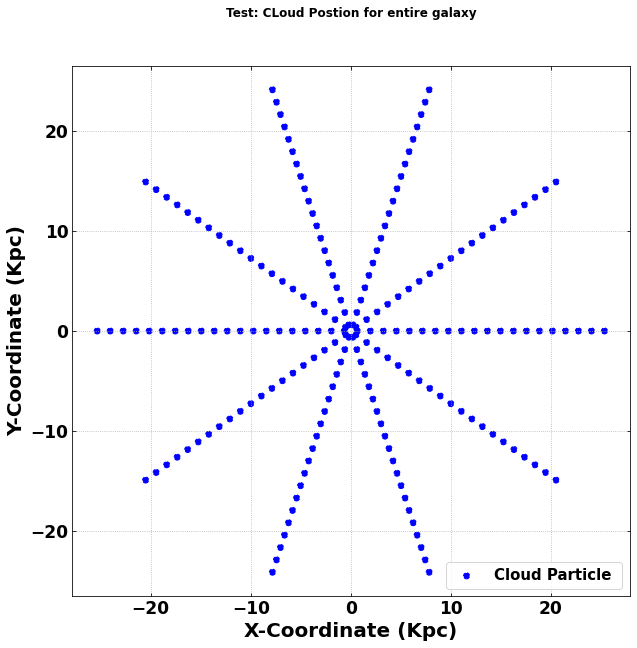

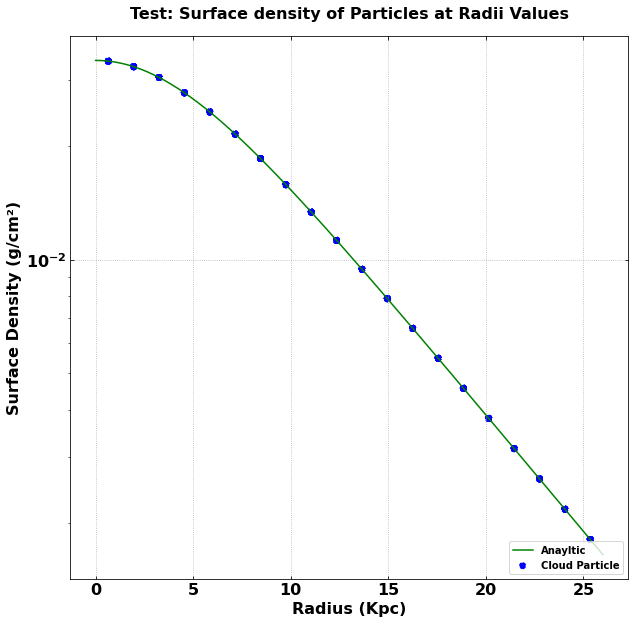

In [15]:
# Setups radius for all particles (rpart_actual2) & calculates x,y components. Setups up sufrace density, area element and mass.

n = 0
for i in range(0, nseg):                                                                                                                 
    angle = separation * i                                                                                                               
    for j in range(0, npart_in_seg):
        rpart_actual2[n]=rpart_actual1[j]
        rpart_area2[n]=rpart_area1[j]
        theta[n] = angle
        xpart[n] = rpart_actual2[n] * m.cos(theta[n])
        ypart[n] = rpart_actual2[n] * m.sin(theta[n])       
        if (j==0):
            p_area_elm[n]=0.5*separation*rpart_area2[n]**2
            surf_rho_at_r[n]=((Mgas_tot*0.25)/(4*a**2))*mp.sech(rpart_actual2[n]/a) #kg/pc^2
            mass[n]=surf_rho_at_r[n]*p_area_elm[n]
        else:
            p_area_elm[n]=(0.5*separation*rpart_area2[n]**2)-(0.5*separation*rpart_area2[n-1]**2)
            surf_rho_at_r[n]=((Mgas_tot*0.25)/(4*a**2))*mp.sech(rpart_actual2[n]/a)
            mass[n]=surf_rho_at_r[n]*p_area_elm[n]
        n=n+1


#   surf_rho_at_r[n]=((Mgas_tot*0.25)/(4*a**2))*mp.sech(rpart_actual2[n]/a)              
surf_rho_at_r_gcm=[ i*1.05026504E-34 for i in surf_rho_at_r]
rpart_actual2_kpc=[ i/1000 for i in rpart_actual2]

## paramters for test plots
rtest=np.arange(0,maxr).tolist()
#rtest1=np.arange(0,26000,130).tolist()

surf_rho_test=[]
#
for i in range(0,maxr):
    surf_rho_test.append((Mgas_tot*0.25/(4*(a**2)))*(mp.sech(i/a))) #*1.05026504E-34

surf_rho_test_gcm=[ i*1.05026504E-34 for i in surf_rho_test]
rtest_kpc=[ i/1000 for i in rtest]

## Test plots

#Scatter plot in of particles in the x-y plane.
fig2, ax2 = plt.subplots(figsize=(10,10),facecolor='white')
ax2.scatter(xpart/1E3, ypart/1E3, color='b', linestyle='--',label='Cloud Particle ')
ax2.grid(linestyle='dotted')
ax2.tick_params(direction='in')
ax2.tick_params(top=True, right=True,labelsize=17)
ax2.legend(loc='lower right',fontsize=15)
ax2.set_title('Test: Cloud Postion for Galaxy',y=1.08)
ax2.set_xlabel('X-Coordinate (Kpc)',fontsize = 20)
ax2.set_ylabel('Y-Coordinate (Kpc)',fontsize = 20)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

M_d_exp=0.355E9*MO2kg
a_exp=4250
R_exp_max=24600
R_exp=np.arange(1,maxr).tolist()
R_exp_kpc=[ i/1000 for i in R_exp]

sigma_exp=[]
for i in range(1,R_exp_max):
    z=i/a_exp
    sigma_exp.append((M_d_exp/(2*np.pi*i**2))*np.exp(-z))

sigma_exp_gcm=[ i*1.05026504E-34 for i in sigma_exp]

# Surface density of the particles compared to the analtyic surface density.  
fig3, ax3 = plt.subplots(figsize=(10,10),facecolor='white')

fontsize=16
labelsize=16

ax3.scatter(rpart_actual2_kpc,surf_rho_at_r_gcm , color='b', linestyle='--',label='Cloud Particle')
ax3.plot(rtest_kpc,surf_rho_test_gcm, color='green',label='Anayltic')
#ax3.plot(R_exp_kpc,sigma_exp_gcm, color='m',label='Anayltic')
ax3.grid(linestyle='dotted')
ax3.tick_params(direction='in')
ax3.tick_params(top=True, right=True)
ax3.legend(loc='lower right')
ax3.set_title('Test: Surface density of Particles at Radii Values',fontsize=fontsize,y=1.02)
ax3.set_xlabel('Radius (Kpc)', fontsize=fontsize)
ax3.set_ylabel('Surface Density (g/cm\N{SUPERSCRIPT TWO})',fontsize=fontsize)
ax3.tick_params(axis='both', which='major', labelsize=labelsize)
ax3.tick_params(axis='both', which='minor', labelsize=labelsize)
ax3.set_yscale("log")
plt.show()

In [11]:

#M_d_exp=3.55E9
#a_exp=9452
#R_exp_max=24600
#R_exp=np.arange(0,maxr).tolist()

#sigma_exp=[]
#for i in range(0,R_exp_max):
#    sigma_exp.append((M_d_exp/(2*np.pi*i**2))*np.exp(-i/a_exp))

In [12]:
# Cumulative mass function of a 2D softened exponential.

def Integrate(m,a,l1,l2):      # Function defining numerical integration.                                     
    result=integrate.quad(lambda x:((np.pi*0.25*m)/(2*a**2))*mp.sech(x/a)*x,l1,l2)
    return result 

mass_intgd0=[Integrate(Mgas_tot,a,0,b) for b in np.arange(0,maxr,1)] # Calling function.

# Selecting mass values from the list, mass_intgd0. 
mass_intgd=[]                                
for i in range(0,len(mass_intgd0)):
    mass_intgd.append(mass_intgd0[i][0]) 

In [13]:
# Manipulating mass list to create cumulative mass profile.
m_enc= []

m_count=Counter(mass)                 # Tells us how many particles have the same mass at each radius.
for value, count in m_count.items():
    m_enc.append(value * count)       # Multiplies all of the same masses together.
m_enc=np.cumsum(m_enc)                # Cumulatively adds masses together in an array.

## Quick test plot for Cumulative mass enclosed.
#fig2, ax02 = plt.subplots(facecolor='white')
#ax02.scatter(rpart_actual1,m_enc, c='red', label='Particle Mass')
#plt.show
print(m_enc[-1]/(MO2kg*1E10))

7.995336816715766


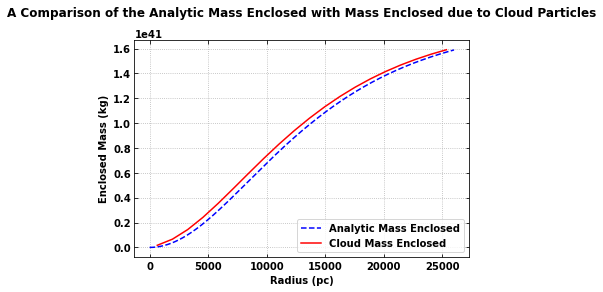

In [14]:
# Comparison of the mass enclosed of the clouds and analytic equation. 

fig4, ax4 = plt.subplots(facecolor='white')
ax4.plot(rtest, mass_intgd, color='b', linestyle='--',label='Analytic Mass Enclosed')
ax4.plot(rpart_actual1, m_enc, color='r',label='Cloud Mass Enclosed')
ax4.grid(linestyle='dotted')
ax4.tick_params(direction='in')
ax4.tick_params(top=True, right=True)
ax4.legend(loc='lower right')
ax4.set_title('A Comparison of the Analytic Mass Enclosed with Mass Enclosed due to Cloud Particles',y=1.08)
ax4.set_xlabel('Radius (pc)')
ax4.set_ylabel('Enclosed Mass (kg)')
plt.show()

In [228]:
## Exported Data is in Kg and pc.

data1 = np.column_stack([xpart, ypart, zpart,theta, rpart_actual2, surf_rho_at_r, mass, p_area_elm])

data2 = np.column_stack([rpart_actual1, m_enc])

# Saving as text files.
np.savetxt('JO201_24kpc_V1_1.txt', data1)
np.savetxt('JO201_24kpc_V1_2.txt', data2)


# Removes Last line from text file as it is blank and will not read into Time Evolution Code.Note: Issue may note occur in pure python terminal.
fd=open("JO201_24kpc_V1_1.txt","r")
d=fd.read()
fd.close()
m=d.split("\n")
s="\n".join(m[:-1])
fd=open("JO201_24kpc_V1_1.txt","w+")
for i in range(len(s)):
    fd.write(s[i])
fd.close()

fd=open("JO201_24kpc_V1_2.txt","r")
d=fd.read()
fd.close()
m=d.split("\n")
s="\n".join(m[:-1])
fd=open("JO201_24kpc_V1_2.txt","w+")
for i in range(len(s)):
    fd.write(s[i])
fd.close()